In [1]:
## 1. Imports & Configuration

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

In [3]:
## 2. Load Dataset

In [4]:
df = pd.read_csv("../data/raw/order_history.csv")
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [5]:
## 3. Dataset Overview

In [6]:
df.shape

(21321, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [8]:
df.describe()

,Restaurant ID,Order ID,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes)
count,2.132100e+04,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,133.000000,3.0,21026.000000,21153.000000
mean,2.074413e+07,6.354622e+09,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,356.409549,0.0,17.332960,4.825070
std,2.447193e+05,1.230263e+08,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,328.128240,0.0,6.283388,4.982591
min,2.032061e+07,6.086767e+09,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,83.580000,0.0,0.000000,0.100000
25%,2.063570e+07,6.250751e+09,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,191.950000,0.0,13.380000,1.000000
50%,2.065987e+07,6.357715e+09,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,272.580000,0.0,16.330000,3.100000
75%,2.088265e+07,6.456827e+09,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,397.840000,0.0,20.050000,7.400000
max,2.152306e+07,6.573392e+09,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,3236.980000,0.0,90.870000,73.800000


In [9]:
## 4. Data Type Conversion

In [10]:
df["Order Placed At"] = pd.to_datetime(df["Order Placed At"], errors="coerce")
df["Order Ready Marked"] = pd.to_datetime(df["Order Ready Marked"], errors="coerce")

/var/folders/r5/39ntwzvn2wl22mr5517j8m6h0000gn/T/ipykernel_4991/2317107765.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Placed At"] = pd.to_datetime(df["Order Placed At"], errors="coerce")
/var/folders/r5/39ntwzvn2wl22mr5517j8m6h0000gn/T/ipykernel_4991/2317107765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Ready Marked"] = pd.to_datetime(df["Order Ready Marked"], errors="coerce")


In [11]:
df.dtypes

Restaurant ID                                                  int64
Restaurant name                                               object
Subzone                                                       object
City                                                          object
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Order Status                                                  object
Delivery                                                      object
Distance                                                      object
Items in order                                                object
Instructions                                                  object
Discount construct                                            object
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)       

In [12]:
## 5. Missing Values Analysis

In [13]:
missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct.sort_values(ascending=False)

Order Ready Marked                                    100.000000
Restaurant penalty (Rejection)                         99.985929
Restaurant compensation (Cancellation)                 99.376202
Cancellation / Rejection reason                        99.127621
Review                                                 98.611697
Customer complaint tag                                 97.800291
Instructions                                           96.623048
Rating                                                 88.316683
Discount construct                                     25.786783
KPT duration (minutes)                                  1.383612
Rider wait time (minutes)                               0.787956
Restaurant ID                                           0.000000
Gold discount                                           0.000000
Total                                                   0.000000
Brand pack discount                                     0.000000
Restaurant discount (Prom

In [17]:
drop_cols = [
    "Order Ready Marked",
    "Restaurant penalty (Rejection)",
    "Restaurant compensation (Cancellation)",
    "Cancellation / Rejection reason",
    "Review",
    "Customer complaint tag",
    "Instructions",
    "Rating",
    "Discount construct"
]
df_eda = df.drop(columns=drop_cols)

In [18]:
df_eda["KPT duration (minutes)"] = df_eda["KPT duration (minutes)"].fillna(
    df_eda["KPT duration (minutes)"].median()
)

df_eda["Rider wait time (minutes)"] = df_eda["Rider wait time (minutes)"].fillna(
    df_eda["Rider wait time (minutes)"].median()
)

In [19]:
## 6. Order Status Distribution

In [23]:
df_eda["Order Status"].value_counts(normalize=True) * 100

Order Status
Delivered           99.108860
Rejected             0.741053
Returned             0.117255
Return cancelled     0.014071
Picked up            0.014071
Timed out            0.004690
Name: proportion, dtype: float64

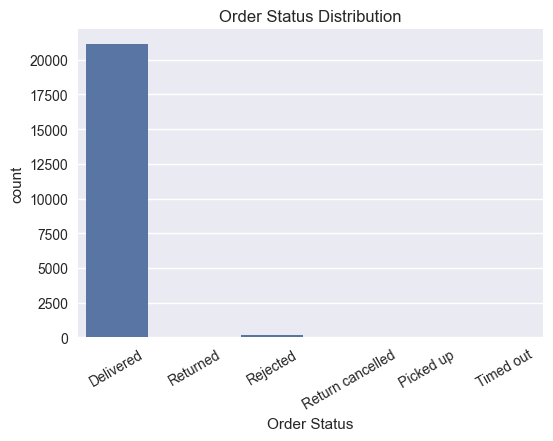

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x="Order Status")
plt.xticks(rotation=30)
plt.title("Order Status Distribution")
plt.show()

In [25]:
## 7. Customer-Level Analysis

In [26]:
orders_per_customer = df_eda.groupby("Customer ID")["Order ID"].count()

orders_per_customer.describe()

count    11607.000000
mean         1.836909
std          2.028240
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         61.000000
Name: Order ID, dtype: float64

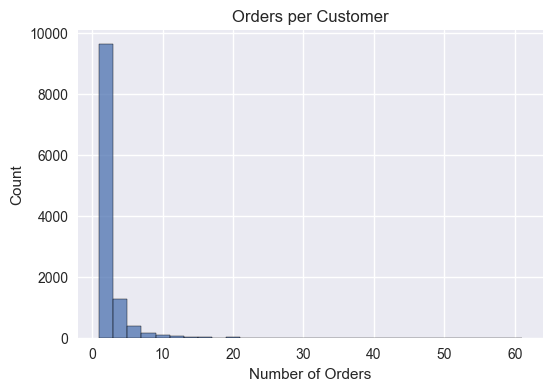

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(orders_per_customer, bins=30)
plt.title("Orders per Customer")
plt.xlabel("Number of Orders")
plt.show()

In [28]:
## 8. Time-Based Order Analysis

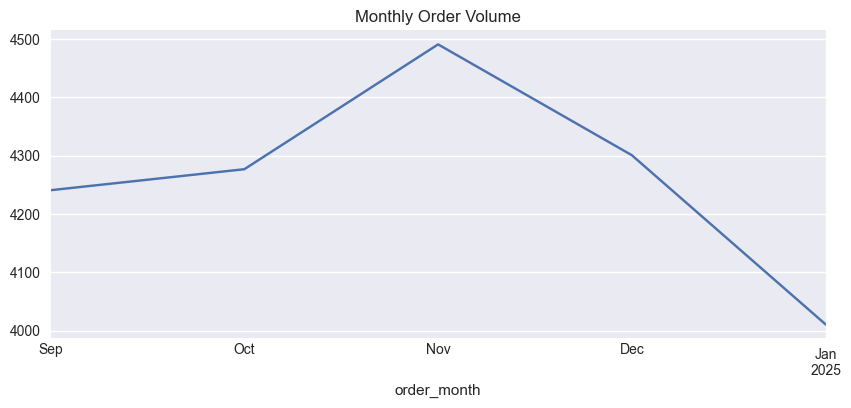

In [29]:
df_eda["order_month"] = df_eda["Order Placed At"].dt.to_period("M")

monthly_orders = df_eda.groupby("order_month")["Order ID"].count()

monthly_orders.plot(figsize=(10,4), title="Monthly Order Volume")
plt.show()

In [30]:
## 9. Customer-Level Aggregation (EDA)

In [31]:
customer_agg = df.groupby("Customer ID").agg(
    total_orders=("Order ID", "count"),
    avg_order_value=("Total", "mean"),
    last_order_date=("Order Placed At", "max")
).reset_index()

customer_agg.head()

,Customer ID,total_orders,avg_order_value,last_order_date
0,000285ae83ecf06a92b936d4f5b74342edb0e1940e1f00...,3,453.6000,2024-10-01 21:32:00
1,00062fa202370fdd3076b794ec9358f36e35469bb8e5ff...,1,628.9500,2024-09-08 17:43:00
2,001ab5fc3ee158b4d22e106897cee9b355e6eed50f163e...,1,1332.4000,2025-01-10 01:38:00
3,001fdf2511dd137361424c9c15ea54774476691ceec5fa...,1,1352.4000,2024-12-13 22:26:00
4,002afbd83626f0c699892fcb07b2ddf3858911482647b6...,4,805.6225,2024-12-09 12:55:00


In [32]:
## 10. Churn Label Creation (Preview)

In [33]:
reference_date = df["Order Placed At"].max()

customer_agg["days_since_last_order"] = (
    reference_date - customer_agg["last_order_date"]
).dt.days

customer_agg["churn"] = np.where(
    customer_agg["days_since_last_order"] > 30, 1, 0
)

customer_agg["churn"].value_counts(normalize=True) * 100

churn
1    73.963987
0    26.036013
Name: proportion, dtype: float64

In [34]:
## 11. Churn Distribution

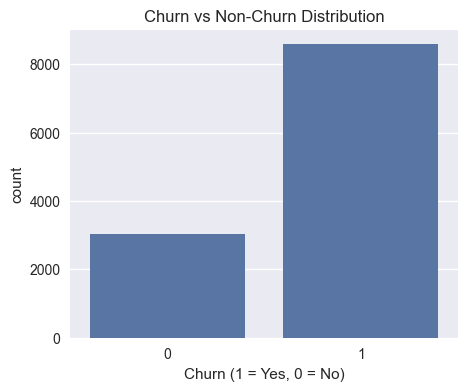

In [35]:
plt.figure(figsize=(5,4))
sns.countplot(x=customer_agg["churn"])
plt.title("Churn vs Non-Churn Distribution")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.show()

In [36]:
## 12. Behavioral Comparison

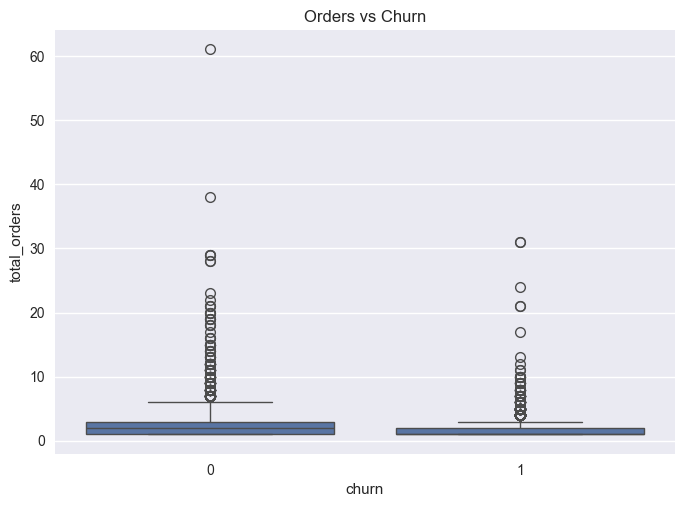

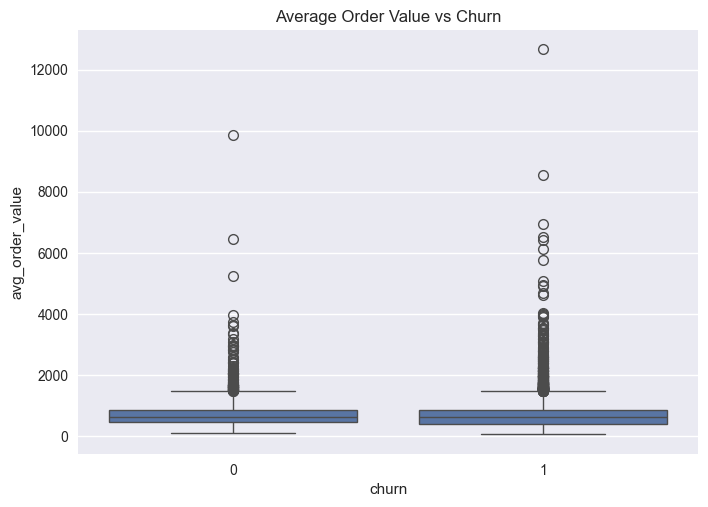

In [40]:
sns.boxplot(data=customer_agg, x="churn", y="total_orders")
plt.title("Orders vs Churn")
plt.show()

sns.boxplot(data=customer_agg, x="churn", y="avg_order_value")
plt.title("Average Order Value vs Churn")
plt.show()

### Key EDA Insights

- Over 99% of orders are successfully delivered; churn modeling is therefore limited to delivered orders only
- Customer behavior is highly skewed, with most users placing one or two orders
- The churn rate (~74%) indicates a strongly imbalanced classification problem
- Recency and engagement signals are expected to be more predictive than raw order counts